# 16. Multiple chart from SQL data

In [1]:
import pyodbc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PyPDF2 import PdfFileWriter, PdfFileReader
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib import style
import os
style.use('fivethirtyeight')

In [2]:
cnxn = pyodbc.connect("Driver={SQL Server Native Client 11.0};"
                      "Server=BDPRADA.LACAISSE.COM;"
                      "Database=zap_beta;"
                      "Trusted_Connection=yes;")

df = pd.read_sql_query('SELECT * FROM fella.Swaption3',cnxn)

In [3]:
df.vDate = pd.to_datetime(df.vDate)
df['ccy'] = df.ccy.astype('category', categories = ['USD','EUR'], ordered =True)
df['expiry'] = df.expiry.astype('category', categories = [ '01M', '03M','06M','01Y','02Y'], ordered =True)
df['tenor'] = df.tenor.astype('category', categories = [ '02Y', '05Y', '10Y', '30Y'], ordered =True)
df['relative_strike'] = pd.to_numeric(df.relative_strike)
df.dtypes

RIC                           object
ccy                         category
expiry                      category
tenor                       category
relative_strike                int64
vDate                 datetime64[ns]
Norm_Vol_JPM                 float64
Norm_Vol_TP                  float64
Norm_vol_Citi                float64
Norm_Vol_TP_clean            float64
Norm_Vol_TP_clean2           float64
dtype: object

In [4]:
df.sort_values(['ccy','expiry','tenor','relative_strike','vDate'],inplace=True)
df = df.reset_index(drop = True)
df.head()

,RIC,ccy,expiry,tenor,relative_strike,vDate,Norm_Vol_JPM,Norm_Vol_TP,Norm_vol_Citi,Norm_Vol_TP_clean,Norm_Vol_TP_clean2
0,SSSR1USD01M02Y,USD,01M,02Y,-100,2000-01-03,96.658608,NaN,NaN,NaN,NaN
1,SSSR1USD01M02Y,USD,01M,02Y,-100,2000-01-04,97.098015,NaN,NaN,NaN,NaN
2,SSSR1USD01M02Y,USD,01M,02Y,-100,2000-01-05,100.725816,NaN,NaN,NaN,NaN
3,SSSR1USD01M02Y,USD,01M,02Y,-100,2000-01-06,100.693591,NaN,NaN,NaN,NaN
4,SSSR1USD01M02Y,USD,01M,02Y,-100,2000-01-07,99.104076,NaN,NaN,NaN,NaN


## Plot

In [5]:
ccy = list(df.ccy.unique())
expiry = list(df.expiry.unique().sort_values())
tenor = list(df.tenor.unique().sort_values())
relative_strike = sorted(df.relative_strike.unique().tolist())

In [8]:
#for i in ccy:
pdf_Title = []
i = 'EUR'
for j in expiry:
    for k in tenor:
        for ii in relative_strike:
            curSeries = df.loc[(df.ccy == i) & (df.expiry == j) & (df.tenor == k) & (df.relative_strike == ii),:]

            plt.figure(figsize=(18, 10), dpi= 80, facecolor='w', edgecolor='k')

            ax1 = plt.subplot2grid((6,6), (0,0), rowspan = 5, colspan =4)
            ax2 = plt.subplot2grid((6,6), (0,5), rowspan = 1, colspan =1)
            ax3 = plt.subplot2grid((6,6), (1,5), rowspan = 1, colspan =1)
            ax4 = plt.subplot2grid((6,6), (2,5), rowspan = 1, colspan =1)
            ax5 = plt.subplot2grid((6,6), (3,5), rowspan = 1, colspan =1)
            ax6 = plt.subplot2grid((6,6), (4,5), rowspan = 1, colspan =1)


            #AX1---------------------------------------------
            x = curSeries.vDate
            y1 = curSeries.Norm_Vol_JPM
            y2 = curSeries.Norm_Vol_TP_clean2
            y3 = curSeries.Norm_vol_Citi


            ax1.plot(x,y1, label = 'Norm_Vol_JPM', linewidth = 2)
            ax1.plot(x,y2, label = 'Norm_Vol_TP_clean', linewidth = 2)
            ax1.plot(x,y3, label = 'Norm_Vol_Citi', linewidth = 2)

            pTitle = i+j+k+str(ii)

            ax1.set_title(pTitle)
            ax1.legend()
            #AX2---------------------------------------------

            expiry1M = np.zeros((len(relative_strike),len(tenor)))
            if j == '01M':
                expiry1M[relative_strike.index(ii), tenor.index(k)] = 1

            ax2.pcolor(expiry1M, edgecolors = 'k', linewidths = 2)

            ax2.set_xticklabels(['02Y', '05Y', '10Y', '30Y'], fontdict = {'fontsize': 10})#, rotation='vertical')
            ax2.set_xticks([.5, 1.5, 2.5, 3.5])
            ax2.set_yticklabels(['-100', '-50', '-25', '0', '25', '50', '100'], fontdict = {'fontsize': 10})#, rotation='vertical')
            ax2.set_yticks([.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5])
            ax2.set_ylabel('01M')

            #AX3---------------------------------------------

            expiry3M = np.zeros((len(relative_strike),len(tenor)))
            if j == '03M':
                expiry3M[relative_strike.index(ii), tenor.index(k)] = 1

            ax3.pcolor(expiry3M, edgecolors = 'k', linewidths = 2)

            ax3.set_xticklabels(['02Y', '05Y', '10Y', '30Y'], fontdict = {'fontsize': 10})#, rotation='vertical')
            ax3.set_xticks([.5, 1.5, 2.5, 3.5])
            ax3.set_yticklabels(['-100', '-50', '-25', '0', '25', '50', '100'], fontdict = {'fontsize': 10})#, rotation='vertical')
            ax3.set_yticks([.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5])
            ax3.set_ylabel('03M')

            #AX4---------------------------------------------

            expiry6M = np.zeros((len(relative_strike),len(tenor)))
            if j == '06M':
                expiry6M[relative_strike.index(ii), tenor.index(k)] = 1

            ax4.pcolor(expiry6M, edgecolors = 'k', linewidths = 2)

            ax4.set_xticklabels(['02Y', '05Y', '10Y', '30Y'], fontdict = {'fontsize': 10})#, rotation='vertical')
            ax4.set_xticks([.5, 1.5, 2.5, 3.5])
            ax4.set_yticklabels(['-100', '-50', '-25', '0', '25', '50', '100'], fontdict = {'fontsize': 10})#, rotation='vertical')
            ax4.set_yticks([.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5])
            ax4.set_ylabel('06M')

            #AX5---------------------------------------------

            expiry1Y = np.zeros((len(relative_strike),len(tenor)))
            if j == '01Y':
                expiry1Y[relative_strike.index(ii), tenor.index(k)] = 1

            ax5.pcolor(expiry1Y, edgecolors = 'k', linewidths = 2)

            ax5.set_xticklabels(['02Y', '05Y', '10Y', '30Y'], fontdict = {'fontsize': 10})#, rotation='vertical')
            ax5.set_xticks([.5, 1.5, 2.5, 3.5])
            ax5.set_yticklabels(['-100', '-50', '-25', '0', '25', '50', '100'], fontdict = {'fontsize': 10})#, rotation='vertical')
            ax5.set_yticks([.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5])
            ax5.set_ylabel('01Y')

            #AX6---------------------------------------------

            expiry2Y = np.zeros((len(relative_strike),len(tenor)))
            if j == '02Y':
                expiry2Y[relative_strike.index(ii), tenor.index(k)] = 1

            ax6.pcolor(expiry2Y, edgecolors = 'k', linewidths = 2)

            ax6.set_xticklabels(['02Y', '05Y', '10Y', '30Y'], fontdict = {'fontsize': 10})#, rotation='vertical')
            ax6.set_xticks([.5, 1.5, 2.5, 3.5])
            ax6.set_yticklabels(['-100', '-50', '-25', '0', '25', '50', '100'], fontdict = {'fontsize': 10})#, rotation='vertical')
            ax6.set_yticks([.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5])
            ax6.set_ylabel('02Y')


            #Save Plot-----------------------------------------
    #        sPath = (r'C:\Users\fella\Desktop\Documents\2.One time\Demande\Tekogan\Swaption\SwaptionPlot')
    #        os.path.join(sPath, pTitle+'.png')  
    #        plt.savefig(os.path.join(sPath, pTitle+'.png'))
    #        plt.close()

            #Save Plot to pdf----------------------------------
            pdf_Title.append(pTitle+'.pdf')
            sPath = (r'C:\Users\fella\Desktop\Documents\2.One time\Demande\Tekogan\Swaption\SwaptionPlot')
            pp = PdfPages(os.path.join(sPath, pTitle+'.pdf'))
            pp.savefig()
            pp.close()
            plt.close()

In [9]:
# Creating a routine that appends files to the output file
def append_pdf(inputfile,output):
    [output.addPage(inputfile.getPage(page_num)) for page_num in range(inputfile.numPages)]
    
# Creating an object where pdf pages are appended to
output = PdfFileWriter()

for files in pdf_Title:
    sample1 = os.path.join(sPath, files)
    append_pdf(PdfFileReader(open(sample1,"rb")),output)
    
output.write(open(os.path.join(sPath, i+'.pdf'),"wb"))

## Single Chart

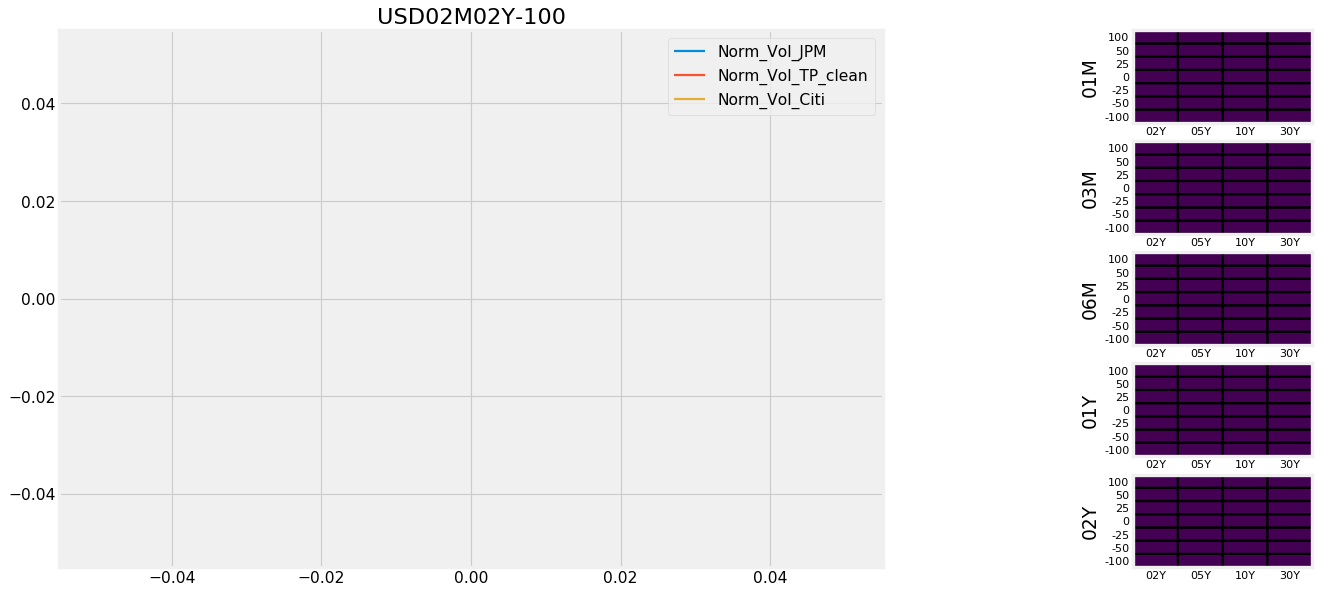

In [11]:
#for i in ccy:
pdf_Title = []
i = 'USD'
j='02M'
k='02Y'
ii=-100
    
curSeries = df.loc[(df.ccy == i) & (df.expiry == j) & (df.tenor == k) & (df.relative_strike == ii),:]

plt.figure(figsize=(18, 10), dpi= 80, facecolor='w', edgecolor='k')

ax1 = plt.subplot2grid((6,6), (0,0), rowspan = 5, colspan =4)
ax2 = plt.subplot2grid((6,6), (0,5), rowspan = 1, colspan =1)
ax3 = plt.subplot2grid((6,6), (1,5), rowspan = 1, colspan =1)
ax4 = plt.subplot2grid((6,6), (2,5), rowspan = 1, colspan =1)
ax5 = plt.subplot2grid((6,6), (3,5), rowspan = 1, colspan =1)
ax6 = plt.subplot2grid((6,6), (4,5), rowspan = 1, colspan =1)


#AX1---------------------------------------------
x = curSeries.vDate
y1 = curSeries.Norm_Vol_JPM
y2 = curSeries.Norm_Vol_TP_clean2
y3 = curSeries.Norm_vol_Citi


ax1.plot(x,y1, label = 'Norm_Vol_JPM', linewidth = 2)
ax1.plot(x,y2, label = 'Norm_Vol_TP_clean', linewidth = 2)
ax1.plot(x,y3, label = 'Norm_Vol_Citi', linewidth = 2)

pTitle = i+j+k+str(ii)

ax1.set_title(pTitle)
ax1.legend()
#AX2---------------------------------------------

expiry1M = np.zeros((len(relative_strike),len(tenor)))
if j == '01M':
    expiry1M[relative_strike.index(ii), tenor.index(k)] = 1

ax2.pcolor(expiry1M, edgecolors = 'k', linewidths = 2)

ax2.set_xticklabels(['02Y', '05Y', '10Y', '30Y'], fontdict = {'fontsize': 10})#, rotation='vertical')
ax2.set_xticks([.5, 1.5, 2.5, 3.5])
ax2.set_yticklabels(['-100', '-50', '-25', '0', '25', '50', '100'], fontdict = {'fontsize': 10})#, rotation='vertical')
ax2.set_yticks([.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5])
ax2.set_ylabel('01M')

#AX3---------------------------------------------

expiry3M = np.zeros((len(relative_strike),len(tenor)))
if j == '03M':
    expiry3M[relative_strike.index(ii), tenor.index(k)] = 1

ax3.pcolor(expiry3M, edgecolors = 'k', linewidths = 2)

ax3.set_xticklabels(['02Y', '05Y', '10Y', '30Y'], fontdict = {'fontsize': 10})#, rotation='vertical')
ax3.set_xticks([.5, 1.5, 2.5, 3.5])
ax3.set_yticklabels(['-100', '-50', '-25', '0', '25', '50', '100'], fontdict = {'fontsize': 10})#, rotation='vertical')
ax3.set_yticks([.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5])
ax3.set_ylabel('03M')

#AX4---------------------------------------------

expiry6M = np.zeros((len(relative_strike),len(tenor)))
if j == '06M':
    expiry6M[relative_strike.index(ii), tenor.index(k)] = 1

ax4.pcolor(expiry6M, edgecolors = 'k', linewidths = 2)

ax4.set_xticklabels(['02Y', '05Y', '10Y', '30Y'], fontdict = {'fontsize': 10})#, rotation='vertical')
ax4.set_xticks([.5, 1.5, 2.5, 3.5])
ax4.set_yticklabels(['-100', '-50', '-25', '0', '25', '50', '100'], fontdict = {'fontsize': 10})#, rotation='vertical')
ax4.set_yticks([.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5])
ax4.set_ylabel('06M')

#AX5---------------------------------------------

expiry1Y = np.zeros((len(relative_strike),len(tenor)))
if j == '01Y':
    expiry1Y[relative_strike.index(ii), tenor.index(k)] = 1

ax5.pcolor(expiry1Y, edgecolors = 'k', linewidths = 2)

ax5.set_xticklabels(['02Y', '05Y', '10Y', '30Y'], fontdict = {'fontsize': 10})#, rotation='vertical')
ax5.set_xticks([.5, 1.5, 2.5, 3.5])
ax5.set_yticklabels(['-100', '-50', '-25', '0', '25', '50', '100'], fontdict = {'fontsize': 10})#, rotation='vertical')
ax5.set_yticks([.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5])
ax5.set_ylabel('01Y')

#AX6---------------------------------------------

expiry2Y = np.zeros((len(relative_strike),len(tenor)))
if j == '02Y':
    expiry2Y[relative_strike.index(ii), tenor.index(k)] = 1

ax6.pcolor(expiry2Y, edgecolors = 'k', linewidths = 2)

ax6.set_xticklabels(['02Y', '05Y', '10Y', '30Y'], fontdict = {'fontsize': 10})#, rotation='vertical')
ax6.set_xticks([.5, 1.5, 2.5, 3.5])
ax6.set_yticklabels(['-100', '-50', '-25', '0', '25', '50', '100'], fontdict = {'fontsize': 10})#, rotation='vertical')
ax6.set_yticks([.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5])
ax6.set_ylabel('02Y')

plt.show()
